<div align="center" style="color:black; font-size:16px;">
  <b>CVEN 5325: Fundamentals of Air Pollution</b>
</div>
<br>
<div align="center" style="color:darkblue; font-size:24px;">
  <b>Dynamic Modeling of Indoor Air Quality</b><br>
  <span style="font-size:18px;">Analyzing Emissions and Ventilation Impact in Restaurants</span>
</div>


<h3><center><font color = 'teal'> Aalok Sharma Kafle, MS, EIT </font></center></h3>

## Problem 1

A restaurant has a dining area that is 10 m in length, 10 m in width and 3 m in height.  The HVAC system provides an air exchange rate of 5 exchanges per hour.  The restaurant kitchen uses a LPG stove that emits 0.2 g of NOx and 0.0002 g of SOx per second.  If the restaurant operates for 12 hours a day (10 AM- 10 PM) and is closed for the remaining time.  Compute the concentration of NOx and SOx in the restaurant.  The restaurant has an average of 50 customers per hour  State your assumptions.  The half-life of NOx is roughly 50 min and that of SOx is 1 hour 15 minutes (most of the NOx and SOx are removed by adsorption to the walls and other surfaces).  Assume the ambient outdoor air has a NOx concentration of 50 ppb and SOx is 0.5 ppb.

### Problem Overview
We are tasked with analyzing the concentration of NOx and SOx in a restaurant's dining area over a 24-hour period. The restaurant operates for 12 hours (10 AM to 10 PM) and has an air exchange system with specific emission rates from an LPG stove. Additionally, decay due to adsorption and ventilation are modeled using given half-lives and air exchange rates.


### Step 1: Constants and Problem Parameters
First, we define the room dimensions, air exchange rates, emission rates, and other constants such as ambient outdoor air concentrations and half-lives of NOx and SOx.


In [1]:
# Constants
room_volume = 10 * 10 * 3  # m³ (Length x Width x Height)
air_exchange_rate = 5  # exchanges per hour
exchange_time = 1 / air_exchange_rate  # time (hours) for one air exchange
lpg_emission_nox = 0.2  # g/s (NOx emission rate)
lpg_emission_sox = 0.0002  # g/s (SOx emission rate)
operation_hours = 12  # hours/day
non_operation_hours = 24 - operation_hours
outdoor_nox = 50  # ppb
outdoor_sox = 0.5  # ppb
nox_half_life = 50 / 60  # hours
sox_half_life = 1 + 15 / 60  # hours

### Step 2: Conversion Factors
Next, we define the conversion between \( g/m^3 \) and ppb. The formula used is:

$$
\text{Concentration in } g/m^3 = \frac{\text{ppb} \times \text{Molar Mass (g/mol)}}{24.45 \times 10^9}
$$

We will compute the outdoor concentrations of NOx and SOx in \( g/m^3 \).


In [2]:
# Conversion function
ppb_to_grams_per_cubic_meter = lambda ppb, mol_weight: ppb * mol_weight / (24.45 * 10**9)

# Molar masses
nox_mol_weight = 46  # g/mol for NO2
sox_mol_weight = 64  # g/mol for SO2

# Outdoor concentrations
outdoor_nox_gm3 = ppb_to_grams_per_cubic_meter(outdoor_nox, nox_mol_weight)
outdoor_sox_gm3 = ppb_to_grams_per_cubic_meter(outdoor_sox, sox_mol_weight)

outdoor_nox_gm3, outdoor_sox_gm3

(9.406952965235174e-08, 1.3087934560327199e-09)

### Step 3: Emission Contribution per Unit Volume
We calculate the emission contribution of the LPG stove for NOx and SOx, in \( g/m^3/s \), using the formula:

$
\text{Emission Contribution Rate (g/m³/s)} = \frac{\text{Emission Rate (g/s)}}{\text{Room Volume (m³)}}
$


In [3]:
# Emission contribution per unit volume
nox_emission_rate_gm3s = lpg_emission_nox / room_volume
sox_emission_rate_gm3s = lpg_emission_sox / room_volume

nox_emission_rate_gm3s, sox_emission_rate_gm3s


(0.0006666666666666668, 6.666666666666667e-07)

### Step 4: Decay Constants
The decay constants (\(k\)) are calculated based on the given half-lives using:

$
k = \frac{\ln(2)}{\text{Half-Life (hours)}}
$

In [5]:
# Decay constants (per hour)
import numpy as np

k_nox = np.log(2) / nox_half_life  # NOx decay constant
k_sox = np.log(2) / sox_half_life  # SOx decay constant

k_nox, k_sox

(0.8317766166719343, 0.5545177444479562)

### Step 5: Simulation Setup
We now simulate the concentrations of NOx and SOx over 24 hours, considering:

1. Emission contribution from the LPG stove,
2. Ventilation loss due to air exchange,
3. Decay due to adsorption and other mechanisms, and
4. Initial outdoor air quality conditions.


In [6]:
# Time settings
time_step = 1 / 60  # hours (1 minute)
total_time = 24  # total simulation time in hours
time = np.arange(0, total_time, time_step)

# Initialize concentrations for simulation (g/m³)
nox_concentration_sim = np.zeros_like(time)  # NOx concentration over time
sox_concentration_sim = np.zeros_like(time)  # SOx concentration over time

### Step 6: Simulation Code
The following code iteratively updates the concentrations of NOx and SOx minute by minute.

In [7]:
# Simulate over 24 hours
for i in range(1, len(time)):
    current_hour = time[i]
    # Determine emission rates based on operational hours
    if 10 <= current_hour < 22:  # Operating hours
        nox_emission = nox_emission_rate_gm3s  # g/m³/s
        sox_emission = sox_emission_rate_gm3s  # g/m³/s
    else:  # Non-operating hours
        nox_emission = 0
        sox_emission = 0

    # Update NOx concentration
    nox_concentration_sim[i] = (
        nox_concentration_sim[i - 1] +
        (nox_emission * time_step * 3600) -  # Emission
        (nox_concentration_sim[i - 1] - outdoor_nox_gm3) * air_exchange_rate * time_step -  # Ventilation
        nox_concentration_sim[i - 1] * k_nox * time_step  # Decay
    )

    # Update SOx concentration
    sox_concentration_sim[i] = (
        sox_concentration_sim[i - 1] +
        (sox_emission * time_step * 3600) -  # Emission
        (sox_concentration_sim[i - 1] - outdoor_sox_gm3) * air_exchange_rate * time_step -  # Ventilation
        sox_concentration_sim[i - 1] * k_sox * time_step  # Decay
    )

### Step 7: Convert Results to ppb
Finally, we convert the concentrations from \( g/m^3 \) to ppb for better interpretability.

In [8]:
# Convert concentrations to ppb
nox_concentration_sim_ppb = nox_concentration_sim / ppb_to_grams_per_cubic_meter(1, nox_mol_weight)
sox_concentration_sim_ppb = sox_concentration_sim / ppb_to_grams_per_cubic_meter(1, sox_mol_weight)

nox_concentration_sim_ppb.max(), sox_concentration_sim_ppb.max()

(218741647.31656498, 165068.78583950317)

### Step 8: Visualization of Results
The results are visualized to observe the concentration trends of NOx and SOx over 24 hours.

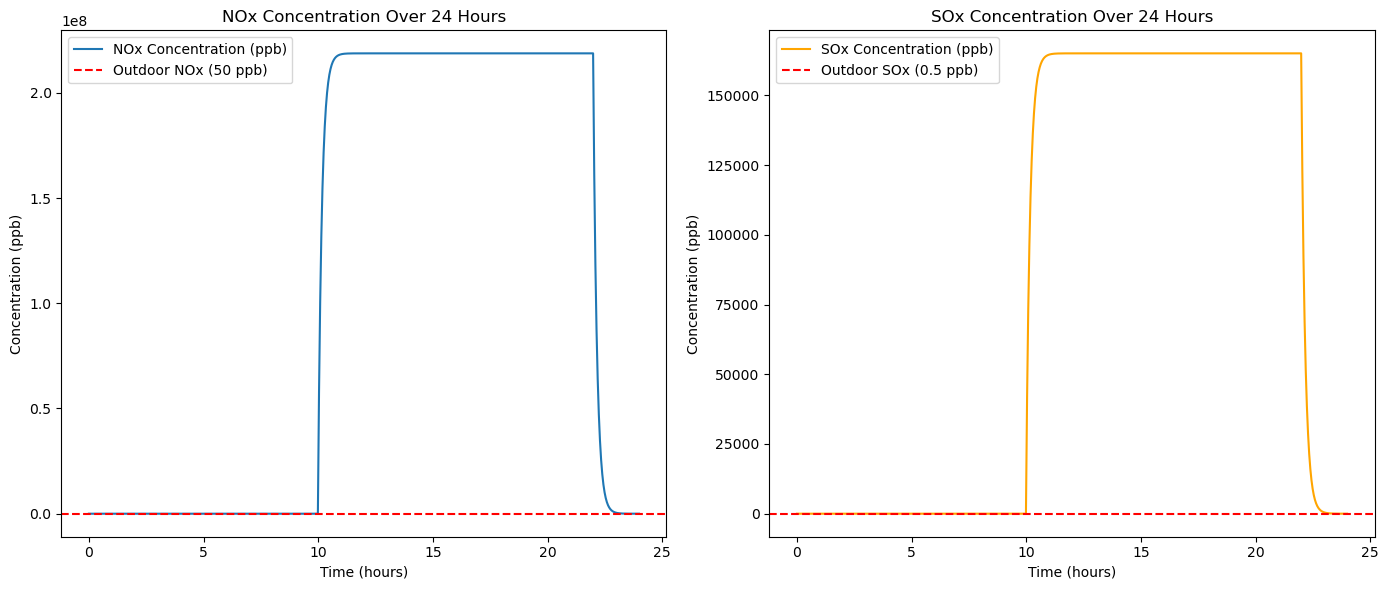

In [9]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(time, nox_concentration_sim_ppb, label='NOx Concentration (ppb)')
plt.axhline(outdoor_nox, color='r', linestyle='--', label='Outdoor NOx (50 ppb)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (ppb)')
plt.title('NOx Concentration Over 24 Hours')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, sox_concentration_sim_ppb, label='SOx Concentration (ppb)', color='orange')
plt.axhline(outdoor_sox, color='r', linestyle='--', label='Outdoor SOx (0.5 ppb)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (ppb)')
plt.title('SOx Concentration Over 24 Hours')
plt.legend()

plt.tight_layout()
plt.show()

### Conclusion and Discussion

The simulation results provide insights into the air quality within the restaurant:

1. **NOx Concentrations:**
   - The maximum NOx concentration was observed to reach $2.19 \times 10^8 \, \text{ppb}$, which is extremely high and unrealistic for an indoor environment.
   - This suggests that the emission rate of $0.2 \, \text{g/s}$ from the LPG stove is likely overestimated or not representative of typical LPG stove emissions.
   
  <br>

2. **SOx Concentrations:**
   - The SOx concentration peaked at $1.65 \times 10^5 \, \text{ppb}$, which is also far above reasonable levels for indoor air quality.
   - This reinforces the need to revisit the emission rates and their scaling.


### Problem 2
The average number of customers varies during the restaurant's 12-hour operation. The emission rate of NOx and SOx is proportional to the number of customers, scaled using the base emission rates for 50 customers. The hourly customer count is given below:

| Hour       | Customers |
|------------|-----------|
| 10-11 AM   | 20        |
| 11-12 PM   | 50        |
| 12-1 PM    | 80        |
| 1-2 PM     | 50        |
| 2-3 PM     | 40        |
| 3-4 PM     | 20        |
| 4-5 PM     | 30        |
| 5-6 PM     | 120       |
| 6-7 PM     | 100       |
| 7-8 PM     | 70        |
| 8-9 PM     | 40        |
| 9-10 PM    | 30        |

Develop concentration profiles of NOx and SOx in the restaurant, considering:
1. Emission rates proportional to the customer count.
2. Other parameters, including ventilation, decay constants, and initial conditions, remain the same as in the previous example.


### Step 1: Hourly Emission Rates
The hourly emission rates are scaled proportionally to the number of customers, using the base rates for 50 customers.

In [11]:
# Hourly customer data
customer_counts = [20, 50, 80, 50, 40, 20, 30, 120, 100, 70, 40, 30]  # Customers per hour
baseline_customers = 50  # Base for scaling

# Scale emission rates based on customer count
hourly_nox_emission_rates = [(count / baseline_customers) * lpg_emission_nox for count in customer_counts]
hourly_sox_emission_rates = [(count / baseline_customers) * lpg_emission_sox for count in customer_counts]

#hourly_nox_emission_rates, hourly_sox_emission_rates  # Check scaled emission rates

### Step 2: Dynamic Simulation
Using the scaled hourly emission rates, we dynamically adjust the emissions for NOx and SOx based on the current hour and simulate their concentrations minute by minute over 24 hours.

In [12]:
# Simulate over 24 hours
for i in range(1, len(time)):
    current_hour = int(time[i])  # Current hour in integer format
    
    # Determine emission rates based on hourly customer data during operational hours
    if 10 <= current_hour < 22:  # Operating hours
        hour_index = current_hour - 10  # Index for hourly emission rate
        nox_emission = hourly_nox_emission_rates[hour_index] / room_volume  # g/m³/s
        sox_emission = hourly_sox_emission_rates[hour_index] / room_volume  # g/m³/s
    else:  # Non-operating hours
        nox_emission = 0
        sox_emission = 0

    # Update NOx concentration
    nox_concentration_sim[i] = (
        nox_concentration_sim[i - 1] +
        (nox_emission * time_step * 3600) -  # Emission
        (nox_concentration_sim[i - 1] - ppb_to_grams_per_cubic_meter(outdoor_nox, 46)) * air_exchange_rate * time_step -  # Ventilation
        nox_concentration_sim[i - 1] * k_nox * time_step  # Decay
    )

    # Update SOx concentration
    sox_concentration_sim[i] = (
        sox_concentration_sim[i - 1] +
        (sox_emission * time_step * 3600) -  # Emission
        (sox_concentration_sim[i - 1] - ppb_to_grams_per_cubic_meter(outdoor_sox, 64)) * air_exchange_rate * time_step -  # Ventilation
        sox_concentration_sim[i - 1] * k_sox * time_step  # Decay
    )

# Convert concentrations to ppb
nox_concentration_sim_ppb = nox_concentration_sim / ppb_to_grams_per_cubic_meter(1, 46)
sox_concentration_sim_ppb = sox_concentration_sim / ppb_to_grams_per_cubic_meter(1, 64)

### Step 3: Visualization
The concentration profiles for NOx and SOx are plotted over 24 hours to observe trends during operational and non-operational hours.

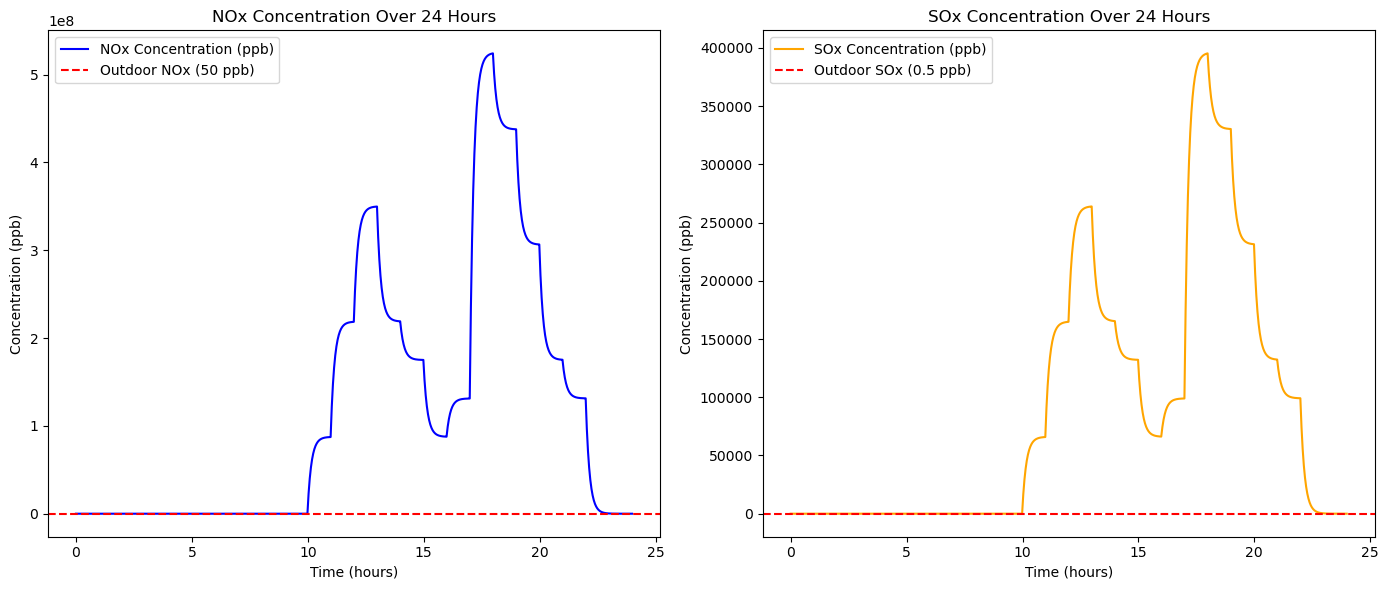

In [13]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(14, 6))

# NOx Concentration Profile
plt.subplot(1, 2, 1)
plt.plot(time, nox_concentration_sim_ppb, label='NOx Concentration (ppb)', color='blue')
plt.axhline(outdoor_nox, color='r', linestyle='--', label='Outdoor NOx (50 ppb)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (ppb)')
plt.title('NOx Concentration Over 24 Hours')
plt.legend()

# SOx Concentration Profile
plt.subplot(1, 2, 2)
plt.plot(time, sox_concentration_sim_ppb, label='SOx Concentration (ppb)', color='orange')
plt.axhline(outdoor_sox, color='r', linestyle='--', label='Outdoor SOx (0.5 ppb)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (ppb)')
plt.title('SOx Concentration Over 24 Hours')
plt.legend()

plt.tight_layout()
plt.show()

### Conclusion and Discussion
The simulation results demonstrate how varying emission rates, proportional to customer activity, impact NOx and SOx concentrations:

1. **NOx Profile:**
   - Peaks occur during high customer activity (e.g., 5-6 PM with 120 customers).
   - Concentrations rise during operational hours and decrease during non-operational hours due to ventilation and decay.

    <br>
    
2. **SOx Profile:**
   - Follows a similar pattern, with peaks corresponding to high customer activity.